# Handwritten Digit Recognition using LeNet-5 CNN Architecture on MNIST Digit Database



## Objective

The objective of a handwritten digit recognition project using the LeNet-5 CNN architecture on the MNIST dataset is to develop and evaluate a machine learning model that can accurately classify images of handwritten digits (0-9). Here are the key objectives and goals for such a project:

1. **Develop a CNN Model**: Implement the LeNet-5 convolutional neural network architecture to process and classify images of handwritten digits.

2. **Achieve High Accuracy**: Train the model to achieve high classification accuracy on the MNIST test dataset, which is crucial for validating the model's performance and reliability.

3. **Understand and Utilize CNN Layers**: Gain insights into how different layers of a CNN (convolutional layers, pooling layers, and fully connected layers) contribute to the feature extraction and classification processes.

4. **Evaluate Model Performance**: Assess the performance of the LeNet-5 model using metrics such as accuracy, precision, recall, and F1-score. This involves testing the model on unseen data and analyzing its classification results.

5. **Compare with Other Models**: Optionally, compare the performance of the LeNet-5 model with other modern CNN architectures or machine learning models to evaluate its effectiveness relative to more recent approaches.

6. **Gain Practical Experience**: Obtain hands-on experience with deep learning frameworks (e.g., TensorFlow, Keras, PyTorch) and gain practical skills in data preprocessing, model training, and performance evaluation.

7. **Demonstrate Model Usability**: Show that the LeNet-5 model can be effectively used for digit recognition tasks, which can be applied to various real-world applications such as automated form processing, check reading, and more.

By achieving these objectives, you’ll be able to demonstrate both your technical skills in implementing CNN architectures and your understanding of image classification tasks.



## MNIST Dataset

**Description:** The MNIST dataset (Modified National Institute of Standards and Technology) is a classic benchmark dataset in the field of machine learning and computer vision. It consists of grayscale images of handwritten digits.

Content:

- **Training Set:** 60,000 images of handwritten digits.
- **Test Set:** 10,000 images of handwritten digits.
- Image Size: Each image is 28x28 pixels.

- **Labels:** Each image is labeled with the digit it represents (0 through 9).

- **Format:** The dataset is provided in a simple format with images and their corresponding labels, making it easy to load and preprocess.

In [2]:
# Loading the libraries 
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist   # Loading the MNIST Dataset
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [26]:
# Preprocess the Data: Normalize the pixel values and reshape the images.

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255


# LeNet- 5 Model

LeNet-5 is a pioneering convolutional neural network (CNN) architecture designed for handwritten digit recognition. It was one of the first CNN architectures to show how deep learning could be used effectively for image classification.

### LeNet-5 Architecture Overview

Here's a breakdown of the LeNet-5 architecture:

**Input Layer:**

- Size: 28x28 pixels (grayscale images)
- Channels: 1 (single channel for grayscale)
- Convolutional Layer 1 (C1):

**Number of Filters: 6**

- Filter Size: 5x5
- Activation Function: ReLU (originally Sigmoid)
- Output Size: 24x24x6 (24x24 spatial dimensions, 6 feature maps)

**Subsampling Layer 1 (S2):**

- Operation: Average Pooling (2x2)**
- Output Size: 12x12x6 (reduces spatial dimensions by a factor of 2)

**Convolutional Layer 2 (C3):**

- Number of Filters: 16
- Filter Size: 5x5
- Activation Function: ReLU (originally Sigmoid)
- Output Size: 8x8x16

**Subsampling Layer 2 (S4):**

- Operation: Average Pooling (2x2)
- Output Size: 4x4x16

**Fully Connected Layer 1 (C5):**

- Number of Neurons: 120
- Activation Function: ReLU (originally Sigmoid)
- Output Size: 120

**Fully Connected Layer 2 (F6):**

- Number of Neurons: 84
- Activation Function: ReLU (originally Sigmoid)
- Output Size: 84

**Output Layer:**

- Number of Neurons: 10 (one for each digit class)
- Activation Function: Softmax (to produce probabilities for each class)

**Key Features**

- **Convolutional Layers:** Extract features from the input image using different filters. Each filter captures different aspects of the image, such as edges or textures.

- **Pooling Layers:** Reduce the spatial dimensions of the feature maps, which helps to decrease computational complexity and control overfitting by providing a form of translation invariance.

- **Fully Connected Layers:** After feature extraction, the high-level features are fed into fully connected layers to classify the image into one of the 10 digit classes.

In [8]:
# Build the LeNet-5 Model

model = models.Sequential([
    layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(16, (5, 5), activation='relu'),
    layers.AveragePooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [10]:
# Compile the model 

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
# Train the model 

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5


844/844 [==============================] - 12s 11ms/step - loss: 0.2963 - accuracy: 0.9103 - val_loss: 0.0968 - val_accuracy: 0.9720
Epoch 2/5
844/844 [==============================] - 8s 9ms/step - loss: 0.0855 - accuracy: 0.9746 - val_loss: 0.0651 - val_accuracy: 0.9803
Epoch 3/5
844/844 [==============================] - 8s 10ms/step - loss: 0.0619 - accuracy: 0.9811 - val_loss: 0.0615 - val_accuracy: 0.9828
Epoch 4/5
844/844 [==============================] - 8s 9ms/step - loss: 0.0502 - accuracy: 0.9846 - val_loss: 0.0522 - val_accuracy: 0.9842
Epoch 5/5
844/844 [==============================] - 9s 10ms/step - loss: 0.0419 - accuracy: 0.9866 - val_loss: 0.0543 - val_accuracy: 0.9843


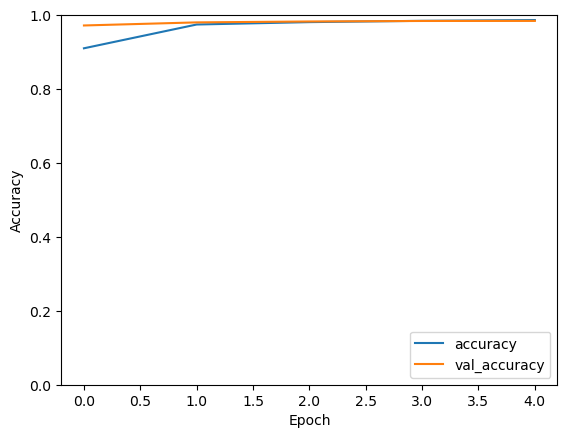

In [14]:
# Plot Training History

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [16]:
# Evaluate the model on test data

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')


313/313 [==============================] - 1s 4ms/step - loss: 0.0438 - accuracy: 0.9865
Test accuracy: 0.9865000247955322


In [18]:
# Make predictions 

predictions = model.predict(x_test)


313/313 [==============================] - 2s 4ms/step


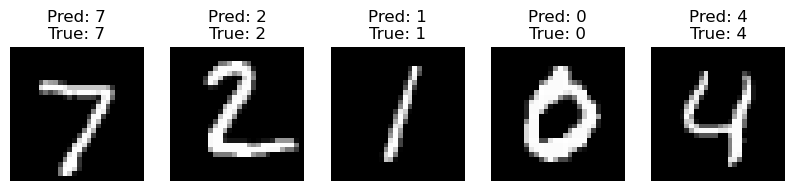

In [20]:
def plot_predictions(images, labels, predictions, num=5):
    plt.figure(figsize=(10, 5))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f'Pred: {np.argmax(predictions[i])}\nTrue: {labels[i]}')
        plt.axis('off')
    plt.show()

plot_predictions(x_test, y_test, predictions)
